In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import cv2
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [ ]:
s = cv2.imread("Tr-me_0870.jpg")

In [ ]:
np.asarray(s)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
s.shape

(512, 512, 3)

In [ ]:
s.max()

254

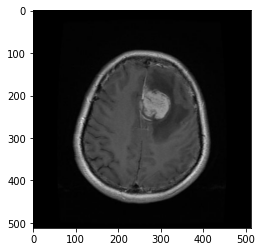

In [ ]:
plt.imshow(s)

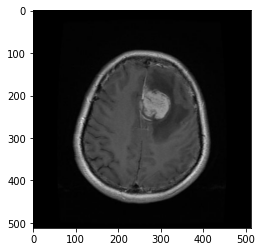

In [ ]:
plt.imshow(s, cmap='gray')

In [ ]:
s1 = s/255

In [ ]:
s1.max()

0.996078431372549

In [ ]:
s1.min()

0.0

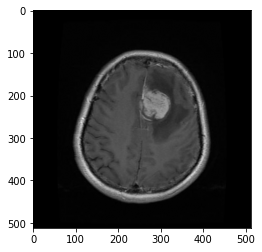

In [ ]:
plt.imshow(s1)

(array([2.20815e+05, 9.51000e+03, 6.41220e+04, 1.28805e+05, 5.23260e+04,
        1.91190e+04, 6.59100e+03, 2.44200e+03, 1.31700e+03, 8.91000e+02,
        7.71000e+02, 6.06000e+02, 5.82000e+02, 5.73000e+02, 4.83000e+02,
        5.79000e+02, 4.47000e+02, 4.89000e+02, 4.83000e+02, 5.28000e+02,
        4.65000e+02, 4.77000e+02, 5.37000e+02, 4.77000e+02, 5.37000e+02,
        4.98000e+02, 5.70000e+02, 5.64000e+02, 6.42000e+02, 6.54000e+02,
        6.36000e+02, 5.76000e+02, 6.39000e+02, 7.38000e+02, 7.62000e+02,
        6.84000e+02, 7.74000e+02, 7.89000e+02, 9.84000e+02, 9.87000e+02,
        1.18800e+03, 1.37400e+03, 1.61400e+03, 1.74900e+03, 1.90800e+03,
        2.08800e+03, 2.28300e+03, 2.25600e+03, 2.09400e+03, 2.25000e+03,
        2.16900e+03, 2.29200e+03, 2.32200e+03, 2.42100e+03, 2.56200e+03,
        2.65200e+03, 2.68800e+03, 2.80500e+03, 2.84400e+03, 2.79000e+03,
        3.19500e+03, 3.62100e+03, 4.26300e+03, 4.72800e+03, 5.20500e+03,
        5.28900e+03, 5.51400e+03, 5.96400e+03, 6.17

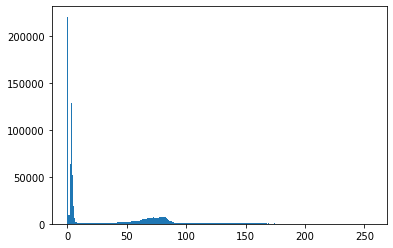

In [ ]:
plt.hist(s.ravel(),256,[0,256])

In [ ]:
s2 =  cv2.bilateralFilter(s,2,50,50)

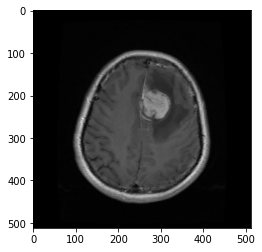

In [ ]:
plt.imshow(s2)

(array([2.20251e+05, 8.84100e+03, 6.32820e+04, 1.29273e+05, 5.35710e+04,
        1.98810e+04, 6.32100e+03, 2.03400e+03, 1.10400e+03, 8.04000e+02,
        7.89000e+02, 6.66000e+02, 6.27000e+02, 5.58000e+02, 5.28000e+02,
        5.46000e+02, 5.28000e+02, 5.16000e+02, 4.59000e+02, 4.92000e+02,
        5.25000e+02, 4.80000e+02, 4.83000e+02, 5.07000e+02, 5.40000e+02,
        5.40000e+02, 5.31000e+02, 5.82000e+02, 5.85000e+02, 5.85000e+02,
        6.06000e+02, 6.54000e+02, 6.87000e+02, 6.30000e+02, 7.11000e+02,
        7.47000e+02, 7.50000e+02, 7.95000e+02, 8.43000e+02, 1.02600e+03,
        1.23300e+03, 1.19100e+03, 1.60500e+03, 1.89300e+03, 1.88100e+03,
        2.09700e+03, 2.24100e+03, 2.32200e+03, 2.19000e+03, 2.17800e+03,
        2.13900e+03, 2.26800e+03, 2.40300e+03, 2.35200e+03, 2.52000e+03,
        2.70000e+03, 2.63700e+03, 2.79000e+03, 2.73300e+03, 3.09000e+03,
        3.15300e+03, 3.39600e+03, 4.29300e+03, 4.97100e+03, 5.26500e+03,
        5.55900e+03, 5.59500e+03, 6.16800e+03, 6.28

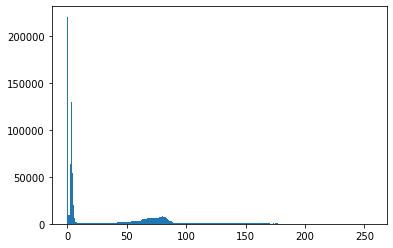

In [ ]:
plt.hist(s2.ravel(),256,[0,256])

In [ ]:
s3 = cv2.medianBlur(s2,5)

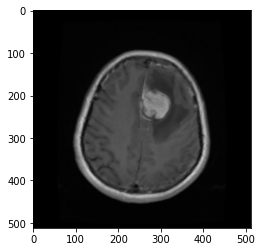

In [ ]:
plt.imshow(s3, cmap='gray')

In [ ]:
s4 = cv2.GaussianBlur(s3, (5,5) , cv2.BORDER_CONSTANT)

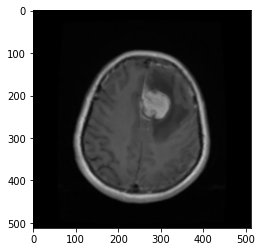

In [ ]:
plt.imshow(s4, cmap='gray')

In [ ]:
ret, thresh1 = cv2.threshold(s4, 127, 190, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)

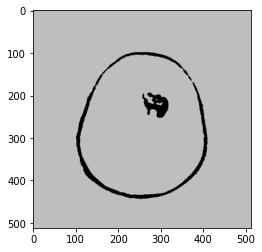

In [ ]:
plt.imshow(thresh1, cmap='gray')

In [ ]:
kernel = np.ones((5, 5), np.uint8)
opening1 = cv2.dilate(thresh1, kernel, iterations=0)
opening2 = cv2.morphologyEx(opening1, cv2.MORPH_CLOSE, kernel)

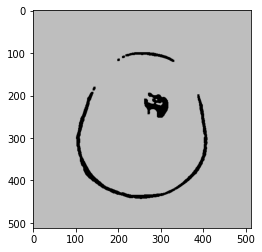

In [ ]:
plt.imshow(opening2, cmap='gray')

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images.

In [ ]:
s5 = cv2.Canny(s, threshold1=140, threshold2=210)

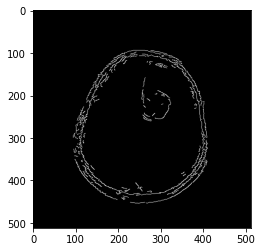

In [ ]:
plt.imshow(s5, cmap='gray')

(array([257745.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

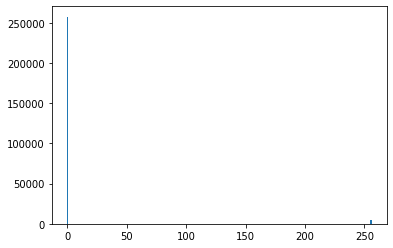

In [ ]:
plt.hist(s5.ravel(),256,[0,256])

In [ ]:
sobelx = cv2.Sobel(s5, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(s5, cv2.CV_64F, 0, 1, ksize=5)
laplacian = cv2.Laplacian(s5, cv2.CV_64F)
blended = cv2.addWeighted(src1=sobelx, alpha=0.5, src2=sobely, beta=0.5,gamma=0)

([], <a list of 0 Text major ticklabel objects>)

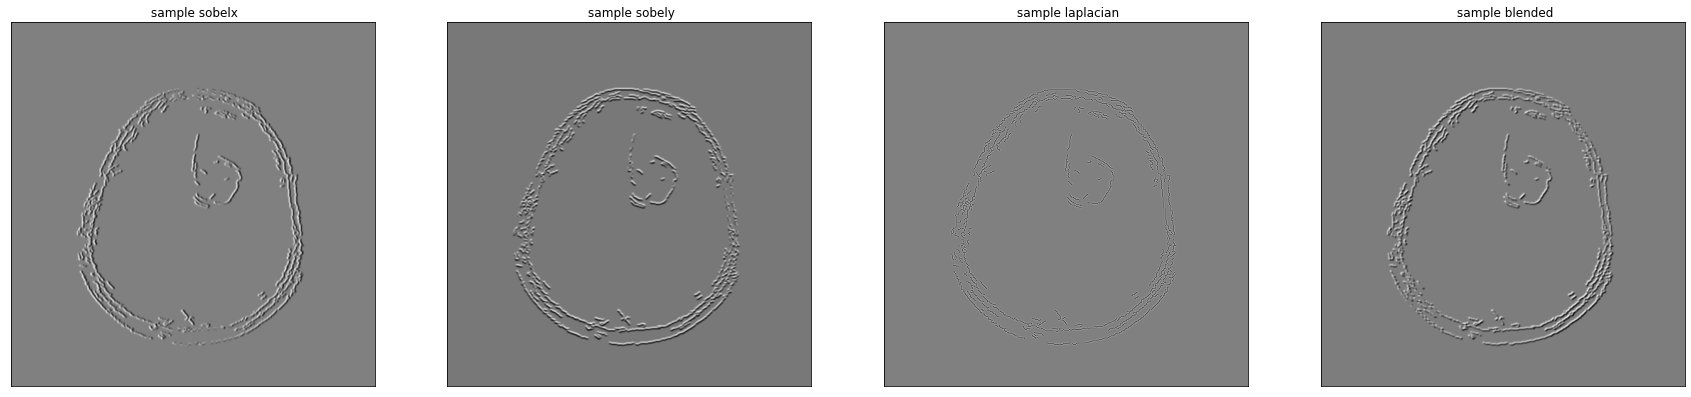

In [ ]:
plt.figure(figsize=(30, 40))

# for i in range(4):

plt.subplot(4, 4 , 1)
plt.imshow(sobelx, cmap='gray')
plt.title( ' sample sobelx')
plt.xticks([])
plt.yticks([])
      
plt.subplot(4, 4,  2)
plt.imshow(sobely, cmap='gray')
plt.title( ' sample sobely')
plt.xticks([])
plt.yticks([])

plt.subplot(4, 4,  3)
plt.imshow(laplacian, cmap='gray')
plt.title(' sample laplacian')
plt.xticks([])
plt.yticks([])

plt.subplot(4, 4, 4)
plt.imshow(blended, cmap='gray')
plt.title( ' sample blended')
plt.xticks([])
plt.yticks([])

(array([241171.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

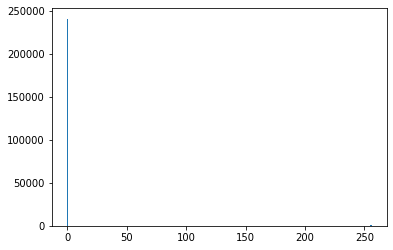

In [ ]:
plt.hist(sobelx.ravel(),256,[0,256])

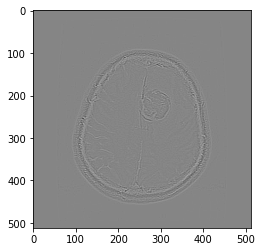

In [ ]:
from scipy import signal
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],]) 
im = Image.open('Tr-me_0870.jpg')
image_gr = im.convert("L") 
grad = signal.convolve2d(image_gr, kernel, mode='same', boundary='symm')
plt.imshow(grad, cmap='gray')

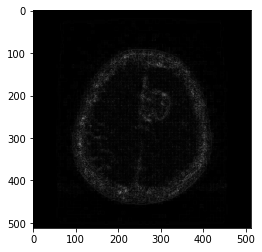

In [ ]:
plt.imshow(np.absolute(grad), cmap='gray')

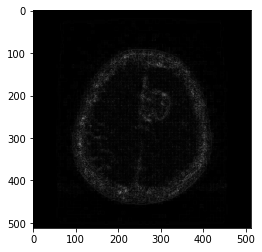

In [ ]:
grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255
plt.imshow(np.absolute(grad_biases), cmap='gray')